# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [ ]:
# 3 Top Observations from Pymaceuticals review
    # 1. The study didn't have gender bias.
    # 2. There is a high correlation between mouse weight and avg tumor volume for the Capomulin treatment.
    # 3. Capomulin and Ramicane had the highest number of completed studies.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_results = pd.merge(study_results, mouse_metadata,how ="left", on="Mouse ID")

# Display the data table for preview
merge_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#check the number of mice
len(merge_results["Mouse ID"].unique())

249

In [3]:
# Get the duplicate mice by ID number that shows Mouse ID and Timepoint
duplicate_mouse_ids = merge_results.loc[merge_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
#Compile Data

clean_results = merge_results[merge_results["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [6]:
#Group by drug name to calculate all tumor volume statistics

group_df = clean_results.groupby("Drug Regimen")


In [7]:
#calculate mean tumor volume and group by drug name
mean_tumor = clean_results.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

mean_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
median_tumor = clean_results.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#median_tumor = group_df["Tumor Volume (mm3)"].median()
median_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
variance_tumor = group_df["Tumor Volume (mm3)"].var()
variance_tumor

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
stddev_tumor = group_df["Tumor Volume (mm3)"].std()
stddev_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
stderr_tumor = group_df["Tumor Volume (mm3)"].sem()
stderr_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
summary_table = pd.DataFrame({
    "mean":mean_tumor, 
    "median":median_tumor, 
    "var":variance_tumor,
    "std":stddev_tumor, 
    "sem":stderr_tumor})

summary_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [26]:
%matplotlib notebook

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using matplotlib
x_axis = np.arange(len(summary_table))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
count_mouse = group_df["Drug Regimen"].count()
count_mouse

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Data Points for each Treatment')

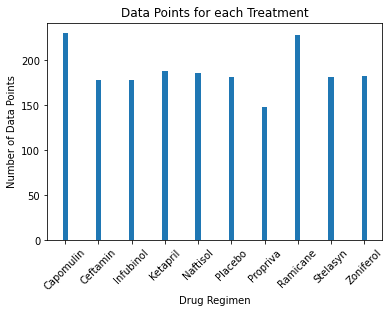

In [82]:
plt.bar(x_axis, count_mouse)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points for each Treatment")


In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot (pandas)


In [18]:
a = clean_results["Drug Regimen"].value_counts()
a

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

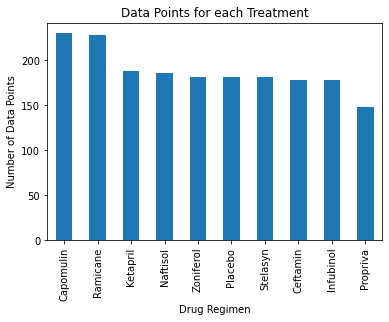

In [83]:

%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points for each Treatment")

plt.show()
#plt.tight_layout()

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

In [44]:
colors = ["blue", "pink"]

#gender_df = clean_results.groupby("Sex")
#gender_percent = clean_results.groupby('Sex').count()['Mouse ID']
gender_percent = mouse_metadata["Sex"].value_counts()
gender_percent

Male      125
Female    124
Name: Sex, dtype: int64

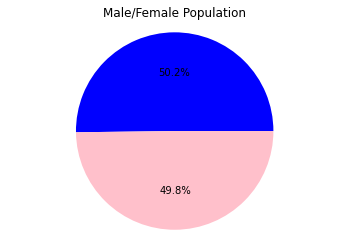

In [86]:
plt.title("Male/Female Population")
plt.pie(gender_percent, colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

In [40]:
b = mouse_metadata["Sex"].value_counts()
b
colors = ["blue", "pink"]

Male      125
Female    124
Name: Sex, dtype: int64

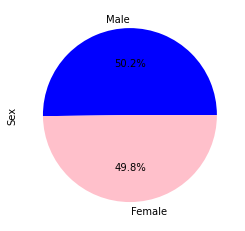

In [87]:
%matplotlib inline


b.plot(kind='pie', colors= colors, autopct="%1.1f%%")

#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Data Points")


plt.show()
#plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers


In [68]:
capo_df = merge_results.loc[merge_results["Drug Regimen"] == "Capomulin",:]
rami_df = merge_results.loc[merge_results["Drug Regimen"] == "Ramicane", :]
infu_df = merge_results.loc[merge_results["Drug Regimen"] == "Infubinol", :]
ceft_df = merge_results.loc[merge_results["Drug Regimen"] == "Ceftamin", :]
ceft_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
170,x822,0,45.0,0,Ceftamin,Male,3,29
171,l558,0,45.0,0,Ceftamin,Female,13,30
172,l733,0,45.0,0,Ceftamin,Female,4,30
173,f436,0,45.0,0,Ceftamin,Female,3,25
174,l490,0,45.0,0,Ceftamin,Male,24,26


In [70]:
capolast = capo_df.groupby('Mouse ID').max()['Timepoint']
capolastvol = pd.DataFrame(capolast)
capolastmerge = pd.merge(capolastvol, merge_results, on=("Mouse ID","Timepoint"),how="left")
capolastmerge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [71]:
tumors = capolastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [73]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers: below {lower_bound} and above {upper_bound}.")

Capomulin potential outliers: below 20.70456164999999 and above 51.83201549.


In [ ]:
# Quantitatively determine ramicane outliers

In [74]:
ramilast = rami_df.groupby('Mouse ID').max()['Timepoint']
ramilastvol = pd.DataFrame(ramilast)
ramilastmerge = pd.merge(ramilastvol, merge_results, on=("Mouse ID","Timepoint"),how="left")
ramilastmerge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [75]:
tumorsx = ramilastmerge["Tumor Volume (mm3)"]

quartilesx = tumorsx.quantile([.25,.5,.75])
lowerqx = quartilesx[0.25]
upperqx = quartilesx[0.75]
iqrx = upperqx-lowerqx

lower_boundx = lowerqx - (1.5*iqrx)
upper_boundx = upperqx + (1.5*iqrx)
print(f"Ramicane potential outliers: below {lower_bound} and above {upper_bound}.")


Ramicane potential outliers: below 20.70456164999999 and above 51.83201549.


In [ ]:
# Quantitatively determine infubinol outliers

In [76]:
infulast = infu_df.groupby('Mouse ID').max()['Timepoint']
infulastvol = pd.DataFrame(infulast)
infulastmerge = pd.merge(infulastvol, merge_results, on=("Mouse ID","Timepoint"),how="left")
infulastmerge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [77]:
tumorsy = infulastmerge["Tumor Volume (mm3)"]

quartilesy = tumorsy.quantile([.25,.5,.75])
lowerqy = quartilesy[0.25]
upperqy = quartilesy[0.75]
iqry = upperqy-lowerqy

lower_boundy = lowerqy - (1.5*iqry)
upper_boundy = upperqy + (1.5*iqry)
print(f"Infubinol potential outliers: below {lower_bound} and above {upper_bound}.")


Infubinol potential outliers: below 20.70456164999999 and above 51.83201549.


In [ ]:
# Quantitatively determine ceftamin outliers

In [78]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, merge_results, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [80]:
tumorsz = ceftlastmerge["Tumor Volume (mm3)"]

quartilesz = tumorsz.quantile([.25,.5,.75])
lowerqz = quartilesz[0.25]
upperqz = quartilesz[0.75]
iqrz = upperqz-lowerqz

lower_boundz = lowerqz - (1.5*iqrz)
upper_boundz = upperqz + (1.5*iqrz)
print(f"Ceftamin potential outliers: below {lower_bound} and above {upper_bound}.")


Ceftamin potential outliers: below 20.70456164999999 and above 51.83201549.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

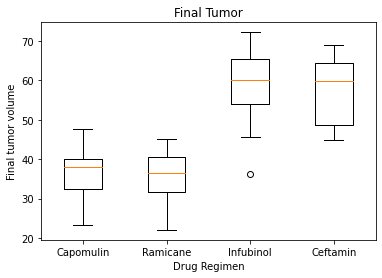

In [81]:
list_tumors = [tumors, tumorsx, tumorsy, tumorsz]


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor')
ax1.set_ylabel('Final tumor volume')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(list_tumors, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [56]:
cap_df = merge_results.loc[merge_results["Drug Regimen"] == "Capomulin",:]

capmouse_df = cap_df.loc[clean_results["Mouse ID"] == "l509",:]
capmouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


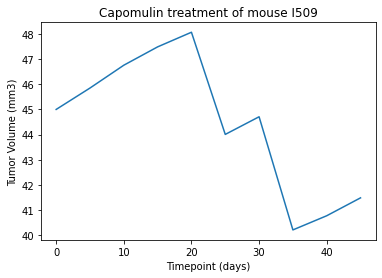

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = capmouse_df["Timepoint"]
y_axis = capmouse_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse I509")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Text(0.5, 1.0, 'Capomulin Treatment Tumor and Weight Relation')

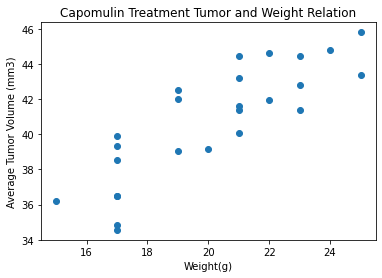

In [58]:
cap_avg = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Capomulin Treatment Tumor and Weight Relation")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [61]:
correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [62]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [63]:
slope = 0.9544396890241045
intercept = 21.552160532685015

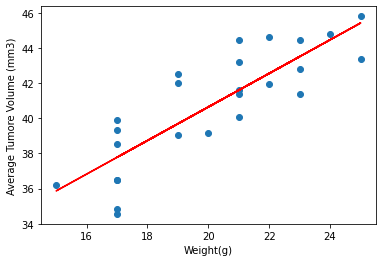

In [64]:
y_axis = cap_avg['Weight (g)']*slope+intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_axis,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()